# Uvod v Pandas

## O Pandas-u


**Dimension & Description**



<table class="table table-bordered">
<tbody><tr>
<th style="text-align:center;">Data Structure</th>
<th style="text-align:center;">Dimensions</th>
<th style="text-align:center;">Description</th>
</tr>
<tr>
<td style="text-align:center;">Series</td>
<td style="text-align:center;">1</td>
<td style="text-align:center;">1D labeled homogeneous array, sizeimmutable.</td>
</tr>
<tr>
<td style="text-align:center;">Data Frames</td>
<td style="text-align:center;">2</td>
<td style="text-align:center;">General 2D labeled, size-mutable tabular structure with potentially heterogeneously typed
columns.</td>
</tr>
<tr>
<td style="text-align:center;">Panel</td>
<td style="text-align:center;">3</td>
<td style="text-align:center;">General 3D labeled, size-mutable array.</td>
</tr>
</tbody></table>


## Importing pandas

In [1]:
import pandas as pd

Check the version:

In [2]:
pd.__version__

'0.24.2'

## Reminder about Built-In Documentation



For example, to display all the contents of the pandas namespace, you can type

In [ ]:
#tabulator vrne vse možnosti, ki jih ima pandas na določeni funkciji
pd.<TAB>

And to display Pandas's built-in documentation, you can use this:

In [4]:
pd?

In [3]:
pd.DataFrame.max?

More detailed documentation, along with tutorials and other resources, can be found at http://pandas.pydata.org/.

## Introducing Pandas Objects



In [4]:
import numpy as np
import pandas as pd

### The Pandas Series Object


To je 1D objekt, kot list

In [6]:
data = pd.Series([0.25,0.5,0.75,1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [9]:
#poberemo numpy array vrednosti
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [10]:
type(data.values)

numpy.ndarray

In [11]:
#nekaj podatkov o nizu
data.index

RangeIndex(start=0, stop=4, step=1)

In [12]:
data[1]

0.5

#### Series as generalized NumPy array


In [13]:
data2 = pd.Series([0.25,0.5,0.75,1.0], index=['a','b','c','d'])
data2

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [14]:
data2['b']

0.5

#### Series as specialized dictionary

In [15]:
population_dict = {'California': 38782937,
                  'Texas': 24568394,
                  'New York': 25478201,
                  'Illinois': 74832284}

In [16]:
population = pd.Series(population_dict)
population

California    38782937
Texas         24568394
New York      25478201
Illinois      74832284
dtype: int64

In [17]:
population['California']

38782937

In [20]:
population['Texas':'New York'] #dobimo vključno z NY

Texas       24568394
New York    25478201
dtype: int64

#### Constructing Series objects

`>>> pd.Series(data, index=index)`


[Dokumentacija](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

### The Pandas DataFrame Object



In [30]:
area_dict = {'California': 4365,
            'Texas': 2324,
            'New York': 1234454,
            'Florida': 1234444,
            'Illinois': 752284}

In [31]:
area = pd.Series(area_dict)

In [32]:
#iz dveh Seriesov zgradimo dataframe
states = pd.DataFrame({'population': population, 'area': area})

In [33]:
states

,population,area
California,38782937.0,4365
Florida,NaN,1234444
Illinois,74832284.0,752284
New York,25478201.0,1234454
Texas,24568394.0,2324


In [36]:
#pogledamo imena vrstic
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [37]:
#pogledamo imena stolpcev
states.columns

Index(['population', 'area'], dtype='object')

#### DataFrame as specialized dictionary


In [38]:
states['area'] #pri numpyu smo pri taki poizvedbi dobili vrstico, tukaj pa dobimo stolpec

California       4365
Florida       1234444
Illinois       752284
New York      1234454
Texas            2324
Name: area, dtype: int64

#### Constructing DataFrame objects



- **From a single Series object**



In [40]:
pd.DataFrame(population, columns=['population'])

,population
California,38782937
Texas,24568394
New York,25478201
Illinois,74832284


 - **From a dictionary of Series objects**
 - **From a two-dimensional NumPy array**
 


In [43]:
pd.DataFrame(np.random.rand(3,2),
            columns=['stolp_1','stolp_2'],
            index=['a','b','c'])

,stolp_1,stolp_2
a,0.885962,0.708950
b,0.961260,0.828051
c,0.478860,0.431756


- **From a list of dicts**



In [44]:
pd.DataFrame([{'a':1, 'b':2}, {'b':3, 'c':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


[Dokumentacija](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

### The Pandas Index Object



Stolpec, ki omogoča označevanje in poimenovanje podatkov.
Array, ki ga ne moremo spreminjati

In [45]:
ind = pd.Index([2,3,5,7,11])

In [46]:
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [47]:
ind.shape

(5,)

In [48]:
ind.size

5

In [49]:
ind.ndim

1

#### Index as immutable array

In [50]:
ind[1] = 0 #to ne dela - ne moremo spreminjati (kot Tuple)

TypeError: Index does not support mutable operations

## Importing Data with Pandas

In [1]:
!head data/DATA_fortune_500_2017.csv

In [5]:
import pandas as pd
import numpy as np
f500 = pd.read_csv('data/DATA_fortune_500_2017.csv', index_col=0)

In [7]:
type(f500)

pandas.core.frame.DataFrame

In [8]:
f500.shape

(500, 22)

##  Introducing DataFrames



<p><img alt="anatomy of a dataframe" src="https://s3.amazonaws.com/dq-content/291/df_anatomy.svg"></p>



Vsak stolpec je lahko svoj podatkovni tip. Za razliko od numpy, kjer je vse en tip.

In [13]:
#vrne podatkovni tip za vsak stolpec
#tip "object" je običajno string
f500.dtypes

Title           object
Website         object
Employees        int64
Sector          object
Industry        object
Hqlocation      object
Hqaddr          object
Hqcity          object
Hqstate         object
Hqzip            int64
Hqtel           object
Ceo             object
Ceo-title       object
Address         object
Ticker          object
Fullname        object
Revenues         int64
Revchange      float64
Profits        float64
Prftchange      object
Assets           int64
Totshequity    float64
dtype: object

In [15]:
#head vrne prvih 5 vrstic
f500.head()

,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Rank,,,,,,,,,,,,,,,,,,,,,
1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,75039,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,94104,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


In [16]:
f500.head(2)

,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Rank,,,,,,,,,,,,,,,,,,,,,
1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0


In [17]:
#tail izpiše zadnjih 5 (ali poljubno, če definiramo) vrstic
f500.tail()

,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Rank,,,,,,,,,,,,,,,,,,,,,
496,Michaels Cos.,http://www.michaels.com,31000,Retailing,Specialty Retailers: Other,"Irving, TX",8000 Bent Branch Dr.,Irving,TX,75063,...,Chairman & Chief Executive Officer,"8000 Bent Branch Dr., Irving, TX 75063",MIK,"The Michaels Companies, Inc.",5197,5.8,378.2,4.2,2148,-1698.0
497,Toll Brothers,http://www.tollbrothers.com,4200,Engineering & Construction,Homebuilders,"Horsham, PA",250 Gibraltar Rd.,Horsham,PA,19044,...,Chief Executive Officer & Director,"250 Gibraltar Rd., Horsham, PA 19044",TOL,"Toll Brothers, Inc.",5170,23.9,382.1,5.2,9737,4229.0
498,Yahoo,http://www.yahoo.com,8500,Technology,Internet Services and Retailing,"Sunnyvale, CA",701 First Ave.,Sunnyvale,CA,94089,...,"President, Chief Executive Officer & Director","701 First Ave., Sunnyvale, CA 94089",YHOO,Yahoo! Inc.,5169,4.0,-214.3,5.2,48083,31049.0
499,Vistra Energy,http://www.vistraenergy.com,4431,Energy,Energy,"Dallas, TX",1601 Bryan St.,Dallas,TX,75201,...,"President, Chief Executive Officer & Director","1601 Bryan St., Dallas, TX 75201",VST,Vistra Energy Corp.,5164,4.0,-214.3,5.2,15167,6597.0
500,ABM Industries,http://www.abm.com,110000,Business Services,Diversified Outsourcing Services,"New York, NY",1 Liberty Plaza,New York,NY,10006,...,"President, Chief Executive Officer & Director","1 Liberty Plaza, New York, NY 10006",ABM,ABM Industries Incorporated,5145,-2.8,57.2,-25,2281,974.0


In [19]:
#samo sprinta, ne moremo shraniti v spremenljivko
f500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 22 columns):
Title          500 non-null object
Website        500 non-null object
Employees      500 non-null int64
Sector         500 non-null object
Industry       500 non-null object
Hqlocation     500 non-null object
Hqaddr         500 non-null object
Hqcity         500 non-null object
Hqstate        500 non-null object
Hqzip          500 non-null int64
Hqtel          500 non-null object
Ceo            500 non-null object
Ceo-title      500 non-null object
Address        500 non-null object
Ticker         500 non-null object
Fullname       500 non-null object
Revenues       500 non-null int64
Revchange      500 non-null float64
Profits        500 non-null float64
Prftchange     500 non-null object
Assets         500 non-null int64
Totshequity    500 non-null float64
dtypes: float64(3), int64(4), object(15)
memory usage: 89.8+ KB


## Pandas Data Selection - indexing


In [20]:
data = pd.Series(['a','b','c'], index=[1,3,5])
data

1    a
3    b
5    c
dtype: object

In [21]:
#pri izbiranju imamo 2 načina
data[1] #izbiramo po indeksih, data[2] v tem primeru ne dela, izbere eksplicitno

'a'

In [24]:
#2. način
data[1:4] #izbere implicitno

3    b
5    c
dtype: object

### Selecting pandas data using “loc” (Selecting Columns From a DataFrame by Label)



<p><img alt="loc single column" src="https://s3.amazonaws.com/dq-content/291/loc_single.svg"></p>



In [27]:
#loc[rows, columns], stolpec mora imeti vpisano točno ime; po indeksih pa iščemo z iloc
#izberemo en stolpec po imenu:
industries = f500.loc[:, 'Industry']
industries.head()
#vrne Series

Rank
1                       General Merchandisers
2    Insurance: Property and Casualty (Stock)
3                 Computers, Office Equipment
4                          Petroleum Refining
5                    Wholesalers: Health Care
Name: Industry, dtype: object

In [28]:
#izberemo več stolpcev
more_cols = f500.loc[:,['Employees', 'Revenues', 'Assets']]

In [30]:
more_cols.head()

,Employees,Revenues,Assets
Rank,,,
1,2300000,485873,198825
2,367700,223604,620854
3,116000,215639,321686
4,72700,205004,330314
5,68000,192487,56563


In [ ]:
#izberemo več stolpcev in pri teh neko območje vrstic od do

In [33]:
#za razliko od numpya, tukaj vključi tudi zadji stolpec
financial_data = f500.loc[:, 'Revenues':'Profits']
financial_data.head()

,Revenues,Revchange,Profits
Rank,,,
1,485873,0.8,13643.0
2,223604,6.1,24074.0
3,215639,-7.7,45687.0
4,205004,-16.7,7840.0
5,192487,6.2,2258.0



<p><img alt="loc list of columns" src="https://s3.amazonaws.com/dq-content/291/loc_list.svg"></p>

In [34]:
#Simple bracket
#industries = f500.loc[:, 'Industry'] #to je daljši način. krajši način:
industries = f500['Industry']

In [35]:
#dot accessor; ni najboljši način, ker so imena stolpcev tako omejena
industries = f500.Industry


<p><img alt="loc slice of columns" src="https://s3.amazonaws.com/dq-content/291/loc_slice.svg"></p>


<p></p><center>
<table>
<thead>
<tr>
<th>Select by Label</th>
<th>Explicit Syntax</th>
<th>Common Shorthand</th>
<th>Other Shorthand</th>
</tr>
</thead>
<tbody>
<tr>
<td>Single column</td>
<td><code>df.loc[:,"col1"]</code></td>
<td><code>df["col1"]</code></td>
<td><code>df.col1</code></td>
</tr>
<tr>
<td>List of columns</td>
<td><code>df.loc[:,["col1", "col7"]]</code></td>
<td><code>df[["col1", "col7"]]</code></td>
<td></td>
</tr>
<tr>
<td>Slice of columns</td>
<td><code>df.loc[:,"col1":"col4"]</code></td>
<td></td>
<td></td>
</tr>
</tbody>
</table>
</center><p></p>




### Selecting Items from a Series by Label



<p><img alt="dataframe exploded" src="https://s3.amazonaws.com/dq-content/291/df_exploded.svg"></p>



<p><img alt="series vs dataframe: series" src="https://s3.amazonaws.com/dq-content/291/df_series_s.svg"></p>


<p><img alt="series vs dataframe: dataframe" src="https://s3.amazonaws.com/dq-content/291/df_series_df.svg"></p>



<center>
<table>
<thead>
<tr>
<th></th>
<th>Series</th>
<th>DataFrame</th>
</tr>
</thead>
<tbody>
<tr>
<th>Dimensions</th>
<td>One</td>
<td>Two</td>
</tr>
<tr>
<th>Has 'index' axis</th>
<td>Yes</td>
<td>Yes</td>
</tr>
<tr>
<th>Has 'columns' axis</th>
<td>No</td>
<td>Yes</td>
</tr>
<tr>
<th>Number of dtypes</th>
<td>One</td>
<td>Many (one per column)</td>
</tr>
</tbody>
</table>
</center>



In [36]:
s = pd.Series([4,7,-5,3], index=['d', 'b', 'a', 'c'])

In [37]:
#posamezen element
s['d']

4

In [38]:
s.loc['d']

4

In [39]:
s['d':'a']

d    4
b    7
a   -5
dtype: int64

In [41]:
s.loc['d':'a']

d    4
b    7
a   -5
dtype: int64

In [42]:
#izberemo več posameznih elementov
s[['a','c']]

a   -5
c    3
dtype: int64

In [43]:
s.loc[['a','c']]

a   -5
c    3
dtype: int64

In [44]:
#lahko uporabljamo tudi metode kot pri slovarjih
'a' in s

True

In [46]:
s.keys()

Index(['d', 'b', 'a', 'c'], dtype='object')

In [48]:
list(s.items())

[('d', 4), ('b', 7), ('a', -5), ('c', 3)]

In [52]:
#iz s500 izberi stolpec Ceo
ceos = f500['Ceo']
ceos.head()

Rank
1    C. Douglas McMillon
2      Warren E. Buffett
3        Timothy D. Cook
4        Darren W. Woods
5     John H. Hammergren
Name: Ceo, dtype: object

In [55]:
ceos_w = ceos[1]
ceos_w

'C. Douglas McMillon'

### Selecting Rows From a DataFrame by Label



<p><img alt="anatomy of a dataframe" src="https://s3.amazonaws.com/dq-content/291/df_anatomy_static.svg"></p>



In [57]:
#oznake vrstic
f500.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            491, 492, 493, 494, 495, 496, 497, 498, 499, 500],
           dtype='int64', name='Rank', length=500)

**pandas.DataFrame.set_index**

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html?highlight=set_index#pandas.DataFrame.set_index

`DataFrame.set_index(keys, drop=True, append=False, inplace=False, verify_integrity=False)`

Set the DataFrame index (row labels) using one or more existing columns. By default yields a new object.

<table>
<colgroup><col class="field-name">
<col class="field-body">
</colgroup><tbody valign="top">
<tr class="field-odd field"><th class="field-name">Parameters:</th><td class="field-body"><dl class="first docutils">
<dt><strong>keys</strong> <span class="classifier-delimiter">:</span> <span class="classifier">column label or list of column labels / arrays</span></dt>
<dd></dd>
</dl>
<p><strong>drop</strong> : boolean, default True</p>
<blockquote>
<div><p>Delete columns to be used as the new index</p>
</div></blockquote>
<p><strong>append</strong> : boolean, default False</p>
<blockquote>
<div><p>Whether to append columns to existing index</p>
</div></blockquote>
<p><strong>inplace</strong> : boolean, default False</p>
<blockquote>
<div><p>Modify the DataFrame in place (do not create a new object)</p>
</div></blockquote>
<p><strong>verify_integrity</strong> : boolean, default False</p>
<blockquote>
<div><p>Check the new index for duplicates. Otherwise defer the check until
necessary. Setting to False will improve the performance of this
method</p>
</div></blockquote>
</td>
</tr>
<tr class="field-even field"><th class="field-name">Returns:</th><td class="field-body"><dl class="first last docutils">
<dt><strong>dataframe</strong> <span class="classifier-delimiter">:</span> <span class="classifier">DataFrame</span></dt>
<dd></dd>
</dl>
</td>
</tr>
</tbody>
</table>

In [58]:
f500.set_index('Title', inplace=True)

In [59]:
f500.head(1)

,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Title,,,,,,,,,,,,,,,,,,,,,
Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,479-273-4000,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0


In [63]:
#izbira ene vrstice
single_row = f500.loc['Walmart']
single_row

Website                               http://www.walmart.com
Employees                                            2300000
Sector                                             Retailing
Industry                               General Merchandisers
Hqlocation                                   Bentonville, AR
Hqaddr                                   702 S.W. Eighth St.
Hqcity                                           Bentonville
Hqstate                                                   AR
Hqzip                                                  72716
Hqtel                                           479-273-4000
Ceo                                      C. Douglas McMillon
Ceo-title      President, Chief Executive Officer & Director
Address           702 S.W. Eighth St., Bentonville, AR 72716
Ticker                                                   WMT
Fullname                               Wal-Mart Stores, Inc.
Revenues                                              485873
Revchange               

In [66]:
#izberemo nek rang vrstic
list_rows = f500.loc[['Walmart','Berkshire Hathaway', 'Apple']]

In [67]:
list_rows

,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Title,,,,,,,,,,,,,,,,,,,,,
Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,479-273-4000,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,402-346-1400,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,408-996-1010,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0


In [69]:
#ta oblika zapisa je rezervirana za vrstice (zato nismo prej uporabili pri oklepajih)
slice_rows = f500['Berkshire Hathaway':'Exxon Mobil']

In [70]:
#prva tri podjetja in stolpca Sector in Industry
f500.head(3)

,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,Hqtel,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Title,,,,,,,,,,,,,,,,,,,,,
Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,72716,479-273-4000,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,68131,402-346-1400,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,95014,408-996-1010,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0


In [73]:
first3 = f500['Walmart':'Apple'][['Sector', 'Industry']]

In [74]:
first3

,Sector,Industry
Title,,
Walmart,Retailing,General Merchandisers
Berkshire Hathaway,Financials,Insurance: Property and Casualty (Stock)
Apple,Technology,"Computers, Office Equipment"


In [90]:
#vse vrstice od Walmart do Exxon Mobil in stolpci od Website do Industry
top5 = f500['Walmart':'Exxon Mobil'].loc[:, 'Website':'Industry']
top5

,Website,Employees,Sector,Industry
Title,,,,
Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers
Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock)
Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment"
Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining


### Selecting pandas data using “iloc”


## Series and Dataframe Describe Methods



### More Data Exploration Methods



<p><img alt="dataframe axis parameters" src="https://s3.amazonaws.com/dq-content/291/axis_param.svg"></p>



###  Assignment with pandas

### Using Boolean Indexing with pandas Objects



<p><img alt="Boolean arrays in pandas" src="https://s3.amazonaws.com/dq-content/291/boolean_array_pandas.svg"></p>



<p><img alt="example dataframe" src="https://s3.amazonaws.com/dq-content/291/eg_df.svg"></p>



<p><img alt="boolean series" src="https://s3.amazonaws.com/dq-content/291/bool_series.svg"></p>



<p><img alt="boolean indexing dataframe" src="https://s3.amazonaws.com/dq-content/291/boolean_indexing_df.svg"></p>



<p><img alt="boolean indexing series" src="https://s3.amazonaws.com/dq-content/291/boolean_indexing_s.svg"></p>




In [93]:
data = {'name': ['Jan', 'Jaka', 'Miha', 'Sara'], 'num': [12, 8, 5, 8]}
df = pd.DataFrame(data, columns=['name','num'], index=['w','x','y','z'])
df

,name,num
w,Jan,12
x,Jaka,8
y,Miha,5
z,Sara,8


In [95]:
num_bool = df['num']==8
num_bool

w    False
x     True
y    False
z     True
Name: num, dtype: bool

In [96]:
df[num_bool]

,name,num
x,Jaka,8
z,Sara,8


In [99]:
result = df.loc[num_bool, 'name'] #izberemo samo določen stolpec
result

x    Jaka
z    Sara
Name: name, dtype: object

In [100]:
#izberi 5 najpogostejših držav v katerih prevladujejo podjetja z motor vehicles in parts industrijo
f500['Industry'].head(10)

Title
Walmart                                  General Merchandisers
Berkshire Hathaway    Insurance: Property and Casualty (Stock)
Apple                              Computers, Office Equipment
Exxon Mobil                                 Petroleum Refining
McKesson                              Wholesalers: Health Care
UnitedHealth Group     Health Care: Insurance and Managed Care
CVS Health            Health Care: Pharmacy and Other Services
General Motors                        Motor Vehicles and Parts
AT&T                                        Telecommunications
Ford Motor                            Motor Vehicles and Parts
Name: Industry, dtype: object

In [109]:
motor_bool = f500['Industry']=='Motor Vehicles and Parts'
motor_country = f500.loc[motor_bool, 'Hqstate']
top5 = motor_country.value_counts().head()
top5

MI    5
OH    2
IL    1
CA    1
Name: Hqstate, dtype: int64

### Using Boolean Arrays to Assign Values



In [124]:
f500 = pd.read_csv('data/DATA_fortune_500_2017.csv', index_col=0)
motor_bool = f500['Industry'] == 'Motor Vehicles and Parts'

In [125]:
f500.loc[motor_bool, 'Industry'] = 'Motor Vehicles & Parts'

In [126]:
f500['Industry'].head(10)

Rank
1                        General Merchandisers
2     Insurance: Property and Casualty (Stock)
3                  Computers, Office Equipment
4                           Petroleum Refining
5                     Wholesalers: Health Care
6      Health Care: Insurance and Managed Care
7     Health Care: Pharmacy and Other Services
8                       Motor Vehicles & Parts
9                           Telecommunications
10                      Motor Vehicles & Parts
Name: Industry, dtype: object

In [128]:
motor_bool = f500[f500['Industry'] == 'Motor Vehicles & Parts']
motor_bool.head()

,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,Hqzip,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
Rank,,,,,,,,,,,,,,,,,,,,,
8,General Motors,http://www.gm.com,225000,Motor Vehicles & Parts,Motor Vehicles & Parts,"Detroit, MI",300 Renaissance Center,Detroit,MI,48265,...,Chairman & Chief Executive Officer,"300 Renaissance Center, Detroit, MI 48265",GM,General Motors Company,166380,9.2,9427.0,-2.7,221690,43836.0
10,Ford Motor,http://www.ford.com,201000,Motor Vehicles & Parts,Motor Vehicles & Parts,"Dearborn, MI",1 American Rd.,Dearborn,MI,48126,...,"President, Chief Executive Officer & Director","1 American Rd., Dearborn, MI 48126",F,Ford Motor Company,151800,1.5,4596.0,-37.7,237951,29170.0
151,Lear,http://www.lear.com,148400,Motor Vehicles & Parts,Motor Vehicles & Parts,"Southfield, MI",21557 Telegraph Rd.,Southfield,MI,48033,...,"President, Chief Executive Officer & Director","21557 Telegraph Rd., Southfield, MI 48033",LEA,Lear Corporation,18558,1.9,975.1,30.8,9901,3057.0
184,Goodyear Tire & Rubber,http://www.goodyear.com,66000,Motor Vehicles & Parts,Motor Vehicles & Parts,"Akron, OH",200 Innovation Way,Akron,OH,44316,...,"Chairman, President & Chief Executive Officer","200 Innovation Way, Akron, OH 44316",GT,The Goodyear Tire & Rubber Company,15158,-7.8,1264.0,311.7,16511,4507.0
283,Autoliv,http://www.autoliv.com,65900,Motor Vehicles & Parts,Motor Vehicles & Parts,"Auburn Hills, MI",1320 Pacific Dr.,Auburn Hills,MI,48326,...,"Chairman, President & Chief Executive Officer","1320 Pacific Dr., Auburn Hills, MI 48326",ALV,"Autoliv, Inc.",10074,9.9,567.1,24.1,8234,3677.0


### Deleting a Column from Your DataFrame


`DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')`

Drop specified labels from rows or columns.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names. When using a multi-index, labels on different levels can be removed by specifying the level.

In [145]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [40, 50, 9], [7, 2, 9], [40, 50, 9], [23, 35, 37]]), 
                  index= [2.5, 12.6, 4.8, 4.8, 2.5], 
                  columns=['A', 'B', 'C'])
df

,A,B,C
2.5,1,2,3
12.6,40,50,9
4.8,7,2,9
4.8,40,50,9
2.5,23,35,37


In [137]:
#izbrišimo stolpec A na mestu
df.drop(columns='A', inplace=True)
df

,B,C
2.5,2,3
12.6,50,9
4.8,2,9
4.8,50,9
2.5,35,37


In [146]:
#isto kot zgoraj
df.drop('A', axis=1, inplace=True)

In [149]:
#izbrišemo podvojene vrednosti glede na vrstice
df_1 = df.drop_duplicates()
df_1

,B,C
2.5,2,3
12.6,50,9
4.8,2,9
2.5,35,37


In [152]:
#izbriše vse vrstice s tem indeksom
df_1.drop([2.5])

,B,C
12.6,50,9
4.8,2,9


### Removing a Row from Your DataFrame




`DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)`

Return DataFrame with duplicate rows removed, optionally only considering certain columns

<table class="docutils field-list" frame="void" rules="none">
<colgroup><col class="field-name">
<col class="field-body">
</colgroup><tbody valign="top">
<tr class="field-odd field"><th class="field-name">Parameters:</th><td class="field-body"><p class="first"><strong>subset</strong> : column label or sequence of labels, optional</p>
<blockquote>
<div><p>Only consider certain columns for identifying duplicates, by
default use all of the columns</p>
</div></blockquote>
<p><strong>keep</strong> : {‘first’, ‘last’, False}, default ‘first’</p>
<blockquote>
<div><ul class="simple">
<li><code class="docutils literal notranslate"><span class="pre">first</span></code> : Drop duplicates except for the first occurrence.</li>
<li><code class="docutils literal notranslate"><span class="pre">last</span></code> : Drop duplicates except for the last occurrence.</li>
<li>False : Drop all duplicates.</li>
</ul>
</div></blockquote>
<p><strong>inplace</strong> : boolean, default False</p>
<blockquote>
<div><p>Whether to drop duplicates in place or to return a copy</p>
</div></blockquote>
</td>
</tr>
<tr class="field-even field"><th class="field-name">Returns:</th><td class="field-body"><dl class="first last docutils">
<dt><strong>deduplicated</strong> <span class="classifier-delimiter">:</span> <span class="classifier">DataFrame</span></dt>
<dd></dd>
</dl>
</td>
</tr>
</tbody>
</table>

### Combining Datasets: Concat and Append


In [14]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)



In [5]:
# example DataFrame
make_df('ABCD', range(3))

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2


#### Concatenation of NumPy Arrays



In [6]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
import pandas as pd
import numpy as np

In [7]:
#tako je v numpy-ju
np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
x = [[1,2],[3,4]]
x

[[1, 2], [3, 4]]

In [9]:
np.concatenate([x,x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

#### Simple Concatenation with pd.concat



`pandas.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)`

[Dokumentacija](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)


In [10]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])


In [11]:
pd.concat([ser1,ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [15]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])



In [16]:
#združuje glede na vrstice (axis=0)
pd.concat([df1,df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [17]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])

In [18]:
pd.concat([df3,df4], axis=1)
#concat([df3,df4], axis='columns') (za vrstice pa axis='index')

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


#### Duplicate indices



In [19]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])

In [20]:
x

,A,B
0,A0,B0
1,A1,B1


In [21]:
y

,A,B
2,A2,B2
3,A3,B3


In [22]:
#df y priredimo indeks kot je pri x
y.index = x.index

In [23]:
x

,A,B
0,A0,B0
1,A1,B1


In [24]:
y

,A,B
0,A2,B2
1,A3,B3


In [25]:
#indeksi se ohranijo
pd.concat([x,y])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


##### Catching the repeats as an error

In [27]:
try:
    pd.concat([x,y], verify_integrity=True) #preverimo, če so podvojeni indeksi
except ValueError as e:
    print("ValueError", e)

ValueError Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


##### Ignoring the index

In [28]:
pd.concat([x,y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


##### Adding MultiIndex keys

In [29]:
#hierarhija indeksov
pd.concat([x,y], keys=['x', 'y'])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

[Več o Hierarchical Indexing](https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html) 

#### Concatenation with joins

In [30]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

In [32]:
#v praksi ni nujno, da imamo enako poimenovane stolpce
#kako združujemo df z različnimi imeni stolpcev

In [33]:
df5

,A,B,C
1,A1,B1,C1
2,A2,B2,C2


In [34]:
df6

,B,C,D
3,B3,C3,D3
4,B4,C4,D4


In [37]:
#outer join
pd.concat([df5,df6])

/home/luka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [38]:
#inner join, ostanejo samo skupni stolpci
pd.concat([df5,df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [39]:
#želimo obdržati samo določene stolpce
pd.concat([df5,df6], join_axes=[df5.columns])

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


#### The append() method



In [42]:
#malo poenostavi concat v določenih primerih
#ne spremeni starega objekta (v tem primeru df1 ali df2)
df3 = df1.append(df2)
df3

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


### Aggregation and Grouping

#### Planets dataset



In [43]:
planets = pd.read_csv('data/DATA_planets.csv')
planets.shape

(1035, 6)

In [44]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [45]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [46]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


#### GroupBy: sestavljen iz Split, Apply, Combine

##### Split, apply, combine

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png" alt="">



In [47]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])


In [48]:
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [49]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [50]:
df.groupby('key').min()

,data
key,
A,0
B,1
C,2


#### The GroupBy object

#### Column indexing

In [51]:
planets.groupby('method')['orbital_period']
#tukaj je objekt Series (če je dataframe, pa je DataFrame)

In [52]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

#### Dispatch methods



In [53]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


#### Aggregate, filter, transform, apply

In [54]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])


In [55]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


##### Aggregation


In [56]:
df.groupby('key')

In [58]:
#sprejme različne vrste ukazov...kot metode, ukazi, ...
df.groupby('key').aggregate(['min', np.median, max, np.mean])

data1                 data2                
      min median max mean   min median max mean
key                                            
A       0    1.5   3  1.5     3    4.0   5  4.0
B       1    2.5   4  2.5     0    3.5   7  3.5
C       2    3.5   5  3.5     3    6.0   9  6.0

In [59]:
#različne operacije po stolpcih
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


##### Filtering



In [60]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [61]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [64]:
#želimo izpisati samo določene vrednosti
def filter_func(x):
    return x['data2'].std() > 4

In [65]:
df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


##### Transformation

In [66]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [67]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


##### The apply() method

In [68]:
#poljubno funkcijo priredimo rezultatom

In [74]:
#podatke želimo normalizirati glede na stolpec data2
def norm_by_data2(x):
    x['data1'] = x['data1'] / x['data2'].sum()
    return x

In [75]:
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


### Working with Time Series

#### Dates and Times in Python


##### Native Python dates and times



In [76]:
#tri vrste časovnih podatkov:
# - time stamp
# - time interval: 2015, 2016, 2017
# - time deltas

In [78]:
from datetime import datetime
date = datetime(year=2015, month=7, day=4)
date

datetime.datetime(2015, 7, 4, 0, 0)

In [79]:
date.strftime('%A')

'Saturday'

##### Typed arrays of times: NumPy's datetime64

In [81]:
#pretvorimo v optimiziran numpy podatkovni tip
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [82]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [83]:
#lahko določimo natančnost podatkov (sekunde, nanosekunde) in s tem pridobimo prostor
#oz. obodbje, ki ga lahko zajamemo v en interval

In [84]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [85]:
np.datetime64('2015-07-04 12:02')

numpy.datetime64('2015-07-04T12:02')

In [86]:
#čas je avtomatsko nastavljen na čas na računalniku

In [87]:
#nastavim še natančnost
np.datetime64('2015-07-04 12:02', 'ns')

numpy.datetime64('2015-07-04T12:02:00.000000000')

[Dokumentacija](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<table>
<thead><tr>
<th>Code</th>
<th>Meaning</th>
<th>Time span (relative)</th>
<th>Time span (absolute)</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>Y</code></td>
<td>Year</td>
<td>± 9.2e18 years</td>
<td>[9.2e18 BC, 9.2e18 AD]</td>
</tr>
<tr>
<td><code>M</code></td>
<td>Month</td>
<td>± 7.6e17 years</td>
<td>[7.6e17 BC, 7.6e17 AD]</td>
</tr>
<tr>
<td><code>W</code></td>
<td>Week</td>
<td>± 1.7e17 years</td>
<td>[1.7e17 BC, 1.7e17 AD]</td>
</tr>
<tr>
<td><code>D</code></td>
<td>Day</td>
<td>± 2.5e16 years</td>
<td>[2.5e16 BC, 2.5e16 AD]</td>
</tr>
<tr>
<td><code>h</code></td>
<td>Hour</td>
<td>± 1.0e15 years</td>
<td>[1.0e15 BC, 1.0e15 AD]</td>
</tr>
<tr>
<td><code>m</code></td>
<td>Minute</td>
<td>± 1.7e13 years</td>
<td>[1.7e13 BC, 1.7e13 AD]</td>
</tr>
<tr>
<td><code>s</code></td>
<td>Second</td>
<td>± 2.9e12 years</td>
<td>[ 2.9e9 BC, 2.9e9 AD]</td>
</tr>
<tr>
<td><code>ms</code></td>
<td>Millisecond</td>
<td>± 2.9e9 years</td>
<td>[ 2.9e6 BC, 2.9e6 AD]</td>
</tr>
<tr>
<td><code>us</code></td>
<td>Microsecond</td>
<td>± 2.9e6 years</td>
<td>[290301 BC, 294241 AD]</td>
</tr>
<tr>
<td><code>ns</code></td>
<td>Nanosecond</td>
<td>± 292 years</td>
<td>[ 1678 AD, 2262 AD]</td>
</tr>
<tr>
<td><code>ps</code></td>
<td>Picosecond</td>
<td>± 106 days</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td><code>fs</code></td>
<td>Femtosecond</td>
<td>± 2.6 hours</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td><code>as</code></td>
<td>Attosecond</td>
<td>± 9.2 seconds</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
</tbody>
</table>

</div>
</div>

#### Dates and times in pandas: best of both worlds


In [89]:
date = pd.to_datetime('4th of July, 2015')
date

Timestamp('2015-07-04 00:00:00')

In [91]:
date.strftime('%A')

'Saturday'

In [93]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

#### Pandas Time Series: Indexing by Time

In [96]:
index_t = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])

In [97]:
data = pd.Series([0,1,2,3], index=index_t)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [98]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [99]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

#### Pandas Time Series Data Structures


- timestamps: Timestamp type, DatetimeIndex
- periods: Period type, PeriodIndex
- delta: Timedelta type, TimeDeltaIndex

In [101]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])



In [102]:
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [103]:
#pretvorimo v period index
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [104]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Example

In [106]:
appl = pd.read_csv('data/DATA_aapl.csv')
appl.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [107]:
appl.set_index('Date', inplace=True)

In [110]:
appl_close = appl['Close']

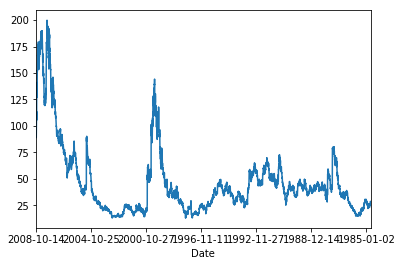

In [111]:
appl_close.plot()

### Understanding SettingwithCopyWarning in pandas


In [112]:
data = pd.read_csv('data/DATA_Xbox.csv')
data.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
0,8213034705,95.0,2.927373,jake7870,0,95.0,117.5
1,8213034705,115.0,2.943484,davidbresler2,1,95.0,117.5
2,8213034705,100.0,2.951285,gladimacowgirl,58,95.0,117.5
3,8213034705,117.5,2.998947,daysrus,10,95.0,117.5
4,8213060420,2.0,0.065266,donnie4814,5,1.0,120.0


#### What is SettingWithCopyWarning?



<img class="full-width" src="https://www.dataquest.io/wp-content/uploads/2019/01/view-vs-copy.png" alt="view-vs-copy">



<img class="full-width" src="https://www.dataquest.io/wp-content/uploads/2019/01/modifying.png" alt="modifying">



In [113]:
#chain assignement
data.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
0,8213034705,95.0,2.927373,jake7870,0,95.0,117.5
1,8213034705,115.0,2.943484,davidbresler2,1,95.0,117.5
2,8213034705,100.0,2.951285,gladimacowgirl,58,95.0,117.5
3,8213034705,117.5,2.998947,daysrus,10,95.0,117.5
4,8213060420,2.0,0.065266,donnie4814,5,1.0,120.0


In [114]:
data[data['bidder']=='parakeet2004']

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
6,8213060420,3.00,0.186539,parakeet2004,5,1.0,120.0
7,8213060420,10.00,0.186690,parakeet2004,5,1.0,120.0
8,8213060420,24.99,0.187049,parakeet2004,5,1.0,120.0


In [115]:
#zdaj želimo spremeniti vrednosti enega stolpca
data[data['bidder']=='parakeet2004']['bidderrate'] = 100

/home/luka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
#podatki v izvornem dataframeu se niso spremenili!!
data[data['bidder'] == 'parakeet2004']

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
6,8213060420,3.00,0.186539,parakeet2004,5,1.0,120.0
7,8213060420,10.00,0.186690,parakeet2004,5,1.0,120.0
8,8213060420,24.99,0.187049,parakeet2004,5,1.0,120.0


In [117]:
#če želimo spremeniti podatke v izvornem df - bolj pravilno kot zgoraj
data.loc[data['bidder'] == 'parakeet2004', 'bidderrate'] = 100

In [118]:
data[data['bidder'] == 'parakeet2004']

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
6,8213060420,3.00,0.186539,parakeet2004,100,1.0,120.0
7,8213060420,10.00,0.186690,parakeet2004,100,1.0,120.0
8,8213060420,24.99,0.187049,parakeet2004,100,1.0,120.0


### Hidden chaining

In [ ]:
#druga varianta, kjer se pojavlja zgornja težava:
#hidden chaining

In [120]:
winners = data.loc[data['bid'] == data['price']]
winners.head()

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price
3,8213034705,117.5,2.998947,daysrus,10,95.00,117.5
25,8213060420,120.0,2.999722,djnoeproductions,17,1.00,120.0
44,8213067838,132.5,2.996632,*champaignbubbles*,202,29.99,132.5
45,8213067838,132.5,2.997789,*champaignbubbles*,202,29.99,132.5
66,8213073509,114.5,2.999236,rr6kids,4,1.00,114.5


In [122]:
#želim dati neko ime na to mesto (prej je NaN)
winners.loc[304, 'bidder'] = 'pravilnoime'

/home/luka/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [124]:
#pravzaprav je delovalo:
#ne moremo pa vedeti, če bo to sigurno delovalo, ker pandas optimizira po svoje (enkrat tako, drugič drugače)
winners.loc[304, 'bidder']

'pravilnoime'

In [125]:
#zgornjo situacijo rešimo tako:
winners = data.loc[data['bid'] == data['price']].copy()
winners.loc[304, 'bidder'] = 'pravilnoime'

In [126]:
#tukaj se ni spremenilo
data.loc[304, 'bidder']

nan

In [127]:
#se je pa tukaj
winners.loc[304, 'bidder']

'pravilnoime'

## Več o 

[Pandas on PyVideo](https://pyvideo.org/)